In [54]:
## Import library

import pandas as pd 
import keras
import numpy as np
import matplotlib.pyplot as plt
from torch import nn


In [20]:
## Load the datas 

fmnist_test = pd.read_csv('fashion-mnist_test.csv')
fmnist_train = pd.read_csv('fashion-mnist_train.csv')

In [21]:
## Sort datas in x and y 

label_fmnist_test = fmnist_test.iloc[:,0]
label_fmnist_train = fmnist_train.iloc[:,0]
fmnist_test = fmnist_test.iloc[:,1:]
fmnist_train = fmnist_train.iloc[:,1:]

In [22]:
##Our label is jsute a number,

label_fmnist_test.shape

<bound method NDFrame.head of 0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int64>

In [64]:
## We create a vector for the output

label_fmnist_test = keras.utils.to_categorical(label_fmnist_test, 10)
label_fmnist_train = keras.utils.to_categorical(label_fmnist_train, 10)

In [73]:
## We then constructs our pictures 
fashion_test = np.array(fmnist_test)
fashion_test2 = fashion_test.reshape(-1,28,28,1)

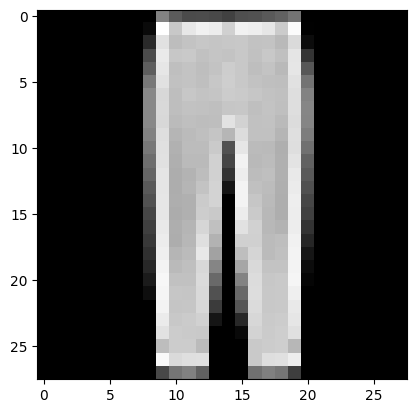

In [74]:
## Show if its good 
exemple_image = fashion_test2[778,:,:,0]
plt.imshow(exemple_image, cmap='gray')

In [ ]:
exemple_image = fashion_test2[778,:,:,0]
plt.imshow(exemple_image, cmap='gray')

In [ ]:
class ClassifierModule(nn.Module):
    def __init__(self):
        super().__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(1, 6, 3),
            nn.ReLU(),
            nn.BatchNorm2d(6),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, 3),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.out = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(128),
            nn.ReLU(),
            nn.Linear(128, 10),
            nn.Softmax(dim=-1),
        )

    def forward(self, X):
        X = self.cnn(X)
        X = self.out(X)
        return X